In [69]:
# Import all the necessary modules

# Statistical modules
import warnings
import time
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# Array and dataframe modules
import numpy as np
import pandas as pd

# Graphing and plotting
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppressing annoying harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')

In [70]:
# Read the 2014 data
df = pd.read_csv("results_2014.csv", error_bad_lines=False)
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [71]:
# Replace the foreign cities (ctz column) that contain NaN with OV for overseas
df.fillna('OV', axis=1, inplace=True)

# Replace some columns that have a '-' with 0
df = df.replace(to_replace='-', value='0')

In [72]:
# Labelencode the country and state columns
le = preprocessing.LabelEncoder()

# Country
le.fit(df['country'])
df['country'] = le.transform(df['country'])

# State
le.fit(df['state'])
df['state'] = le.transform(df['state'])

In [73]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,OV,...,8,3.27,50,59.18,8.02,39.72,37.65,41,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,OV,...,21,5.30,50,99.33,16.22,69.47,65.83,42,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,OV,...,1,3.08,50,56.45,7.75,38.03,36.10,59,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,OV,...,27,5.37,50,99.33,16.20,69.47,65.83,26,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,OV,...,2,3.10,50,57.03,8.02,38.60,36.58,41,Nogata Fukuoka,76.72


In [74]:
# Drop some of the categorical features as we will (or may) not use them at all
df.drop(['name', 'bib', 'ctz', 'city', 'overall'], axis=1, inplace=True)

In [75]:
df.fillna(0)

,10k,division,25k,gender,age,official,genderdiv,35k,pace,state,30k,5k,half,20k,country,40k
0,17.37,8,47.67,M,47,85.25,8,71.40,3.27,50,59.18,8.02,39.72,37.65,41,80.43
1,32.58,1,82.43,F,33,138.95,1,116.37,5.30,50,99.33,16.22,69.47,65.83,42,132.10
2,16.62,1,45.80,M,41,80.60,1,67.42,3.08,50,56.45,7.75,38.03,36.10,59,76.10
3,32.57,3,82.43,F,24,140.58,3,116.37,5.37,50,99.33,16.20,69.47,65.83,26,132.95
4,17.12,2,46.37,M,40,81.23,2,67.83,3.10,50,57.03,8.02,38.60,36.58,41,76.72
5,32.58,4,82.45,F,29,140.68,4,116.37,5.37,50,99.33,16.22,69.47,65.83,42,132.95
6,17.65,4,47.67,M,28,84.65,4,70.23,3.23,50,58.60,8.38,39.72,37.65,63,79.83
7,30.48,5,76.95,M,29,129.83,5,107.47,4.97,50,92.52,15.17,64.85,61.62,26,122.80
8,17.12,3,46.37,M,43,81.23,3,67.83,3.10,50,57.03,8.00,38.60,36.60,41,76.70
9,30.48,20,77.68,M,31,137.83,20,112.27,5.27,9,94.78,15.15,65.23,61.78,74,129.83


To begin with, we try clustering with continuous variables only. Later we can add the categorical features and use `LabelEncoder` or `OneHotEncoder` methods.

In [76]:
# Convert some of the features which are of type object to numeric as we will need them for plotting

df['10k'] = pd.to_numeric(df['10k'])
df['25k'] = pd.to_numeric(df['25k'])
df['35k'] = pd.to_numeric(df['35k'])
df['30k'] = pd.to_numeric(df['30k'])
df['5k'] = pd.to_numeric(df['5k'])
df['half'] = pd.to_numeric(df['half'])
df['20k'] = pd.to_numeric(df['20k'])
df['40k'] = pd.to_numeric(df['40k'])
df['official'] = pd.to_numeric(df['official'])

# We drop all rows where the columns have zeros.
# This is because anyone clocking zero minutes mean that they probably dropped off the marathon

df = df[df != 0]
# Don't know why the following block of code does not work
#groups = ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k', 'official']
# for group in groups:
#    df[group] = pd.to_numeric(df[group])
#    df[group] = df[df[group] != 0]

In [77]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,pace,state,30k,5k,half,20k,country,40k
count,31934.000000,31984.000000,31768.000000,31984.000000,31984.000000,31984.000000,31950.000000,31984.000000,31983.000000,31944.000000,31932.000000,31912.000000,31933.000000,31969.000000,31945.000000
mean,51.799275,1932.563032,133.612055,42.407079,242.997314,8051.044741,196.857605,9.275658,33.678704,164.571219,25.755559,111.664566,105.711669,66.539491,229.001490
std,8.965513,1715.228694,25.596958,11.316496,52.300431,4754.005626,41.979107,1.992486,17.093039,33.953683,4.327830,21.061188,19.780525,19.037514,49.159902
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,3.080000,1.000000,56.450000,7.750000,38.030000,36.100000,1.000000,76.100000
25%,45.400000,610.000000,115.470000,33.000000,205.527500,3972.000000,167.122500,7.850000,25.000000,140.670000,22.650000,96.845000,91.750000,74.000000,193.820000
50%,50.330000,1425.000000,128.875000,42.000000,232.370000,7970.000000,188.170000,8.870000,28.000000,157.730000,25.080000,107.830000,102.150000,74.000000,218.850000
75%,57.170000,2611.000000,147.735000,50.000000,273.235000,11968.000000,220.170000,10.430000,50.000000,182.880000,28.470000,123.070000,116.520000,74.000000,257.450000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,20.570000,68.000000,376.380000,86.950000,236.670000,224.350000,77.000000,508.350000


In [78]:
df = df.dropna()

In [79]:
# Make a copy of the cleaned up dataframe
df_copy = df

In [80]:
# Separate the features from labels
X = df.loc[:, ['10k', '25k', '35k', '30k', '5k', 'half', '20k', '40k']]

Below, we try KMeans clusters for various cluster numbers from 2 to 10 just to trace the performance as well as the optimal clusters.

In [81]:
X.head()

,10k,25k,35k,30k,5k,half,20k,40k
0,17.37,47.67,71.40,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,116.37,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,67.42,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,116.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,67.83,57.03,8.02,38.60,36.58,76.72


In [82]:
# For better quality graphs
plt.rcParams['figure.dpi'] = 100

The Kmeans model is: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=1e-07, verbose=0)


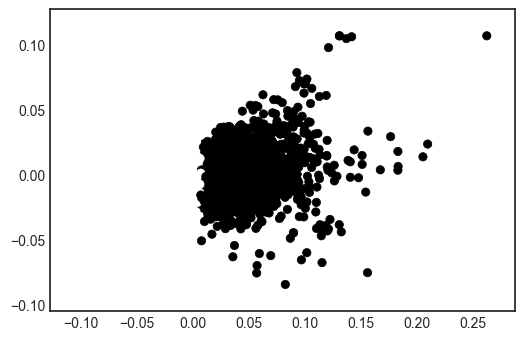

K: 2, silhouette: 0.5323537317097327
The Kmeans model is: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=1e-07, verbose=0)


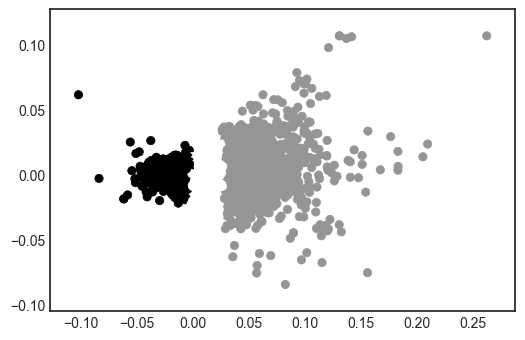

K: 3, silhouette: 0.4576833544969718
The Kmeans model is: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=1e-07, verbose=0)


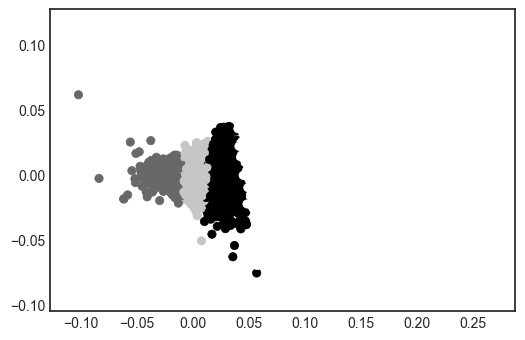

K: 4, silhouette: 0.4067017396981625
Frequency of unique values of the said array:
[[    0     1     2     3]
 [ 1228 11385 12729  6291]]
Converged iterations are 39
Comparing k-means clusters against the data:
Time taken =  54.92 seconds


In [83]:
start = time.time()

# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components using PCA
X_pca = PCA(2).fit_transform(X_norm)

# Calculate the distance from the center of the cluster to plot the elbow graph
distorsions = []
K = range(2, 5)
for k in K:
    kmeans = KMeans(n_clusters=k, tol=0.0000001, random_state=42).fit(X_pca)
    distorsions.append(kmeans.inertia_)
    print('The Kmeans model is: \n', kmeans)
    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
    plt.show()
    labels = kmeans.labels_
    silhouette = metrics.silhouette_score(X_norm, labels, metric='euclidean')
    print('K: {}, silhouette: {}'.format(k, silhouette))

# We count the frequency of the clusters found by the KMeans algorithm.
# We also print the number of iteration when KMeans converged even though max_iter
# was set to the deafult value of 100

unique_elements, counts_elements = np.unique(
    kmeans.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
print('Converged iterations are {}'.format(kmeans.n_iter_))


# Check the solution against the data.
print('Comparing k-means clusters against the data:')

print('Time taken = ', round(time.time()-start, 2), 'seconds')

As one can see from the cluster plots and silhouette values, performance and efficiency deteriorates beyond 3 clusters. This is also obvious from the elbow graph plotted further below.

In [84]:
# Run minibtachkmenas with the Bostom Marathon features
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
y_pred = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
#print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:


The minibatchkmeans is no better either. But below we experiment with the original features without reducing their dimensionality with PCA.

In [85]:
start = time.time()

# Run KMeans without PCA

kmeans_no_pca = KMeans(n_clusters=2, tol=0.0000001, random_state=42).fit(X)
print('The Kmeans model is: \n', kmeans_no_pca)

y_pred = kmeans.fit_predict(X)
unique_elements, counts_elements = np.unique(
    kmeans_no_pca.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
print('Converged iterations are {}'.format(kmeans_no_pca.n_iter_))

# Check the solution against the data.
print('Comparing k-means clusters against the data:')

print('Time taken = ', round(time.time()-start, 2), 'seconds')

The Kmeans model is: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=1e-07, verbose=0)
Frequency of unique values of the said array:
[[    0     1]
 [ 9970 21663]]
Converged iterations are 18
Comparing k-means clusters against the data:
Time taken =  1.1 seconds


In [86]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=500)

# Declare and fit the model.
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X_norm)

# Extract cluster assignments for each data point.
labels = mean_shift.labels_

# Coordinates of the cluster centers.
cluster_centers = mean_shift.cluster_centers_

# Count our clusters.
n_clusters = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters))

# Get labels, number of clusters, similarity score
silhouette = metrics.silhouette_score(X_norm, labels, metric='euclidean')
print('K: {}, silhouette: {}'.format(n_clusters, silhouette))

Number of estimated clusters: 85
K: 85, silhouette: 0.2707135872833278


MeanShift does not perform well predicting 129 cluster with a low silhouette number.

Text(0.5, 1.0, 'Elbow curve')

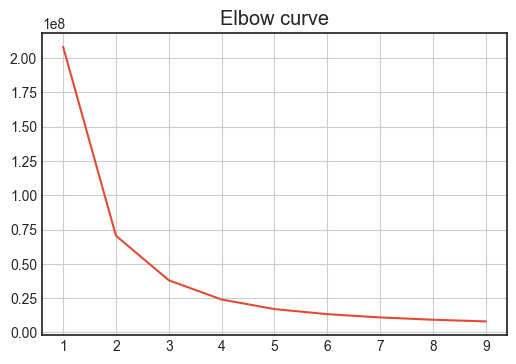

In [87]:
# Determine the optimal number of clusters using elbow curve plot

distorsions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.plot(K, distorsions)
plt.grid(True)
plt.title('Elbow curve')

The Kmeans model is: 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=1e-07, verbose=0)
Frequency of unique values of the said array:
[[    0     1]
 [ 9970 21663]]
Converged iterations are 18


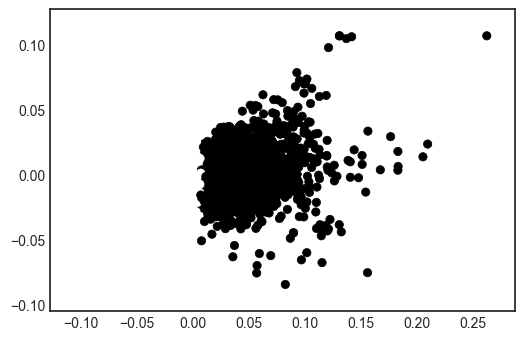

K: 2, silhouette: 0.5323537317097327
Comparing k-means clusters against the data:
Time taken =  80.06 seconds


In [88]:
# Here we append the y_pred or the clusters predicted by the algorithm and analyze the data
# But first, we re-run KMeans with 2 clusters

kmeans = KMeans(n_clusters=2, tol=0.0000001, random_state=42).fit(X_pca)
print('The Kmeans model is: \n', kmeans)

y_pred = kmeans.fit_predict(X_pca)
unique_elements, counts_elements = np.unique(
    kmeans_no_pca.labels_, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))
print('Converged iterations are {}'.format(kmeans_no_pca.n_iter_))

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()
labels = kmeans.labels_
silhouette = metrics.silhouette_score(X_norm, labels, metric='euclidean')
print('K: {}, silhouette: {}'.format(2, silhouette))

# Check the solution against the data.
print('Comparing k-means clusters against the data:')

print('Time taken = ', round(time.time()-start, 2), 'seconds')

In [89]:
# Restore our original dataframe
# Add the clusters assigned to our original dataframe
df = df_copy

# Concatenate the clusters for each row
df = df.assign(predict=y_pred)

In [90]:
# Separate the data by cluster number for plotting
pie_0_df = df[df['predict'] == 0]
pie_1_df = df[df['predict'] == 1]

In [91]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)
mpl.style.use(['ggplot'])  # optional: for ggplot-like style

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [92]:
# In order to use the plt.subplots we ar creating the x and y data into a dataframe.
# We will create one dataframe grouped by the distance run such as 10k, 25k etc, for each cluster.
# Below we create for cluster zero and 10K

plot_df = pd.DataFrame()
plot_df['10k'] = pie_0_df['10k']
plot_df['age'] = pie_0_df['age']
plot_df['gender'] = pie_0_df['gender']

# Convert the gender column to color that will used in the plots
plot_df['gender'] = np.where(plot_df['gender'] == 'M', 'r', 'b')

In [93]:
# Calculate the mean to draw the average line on the graphs

avg = plot_df['10k'].mean()

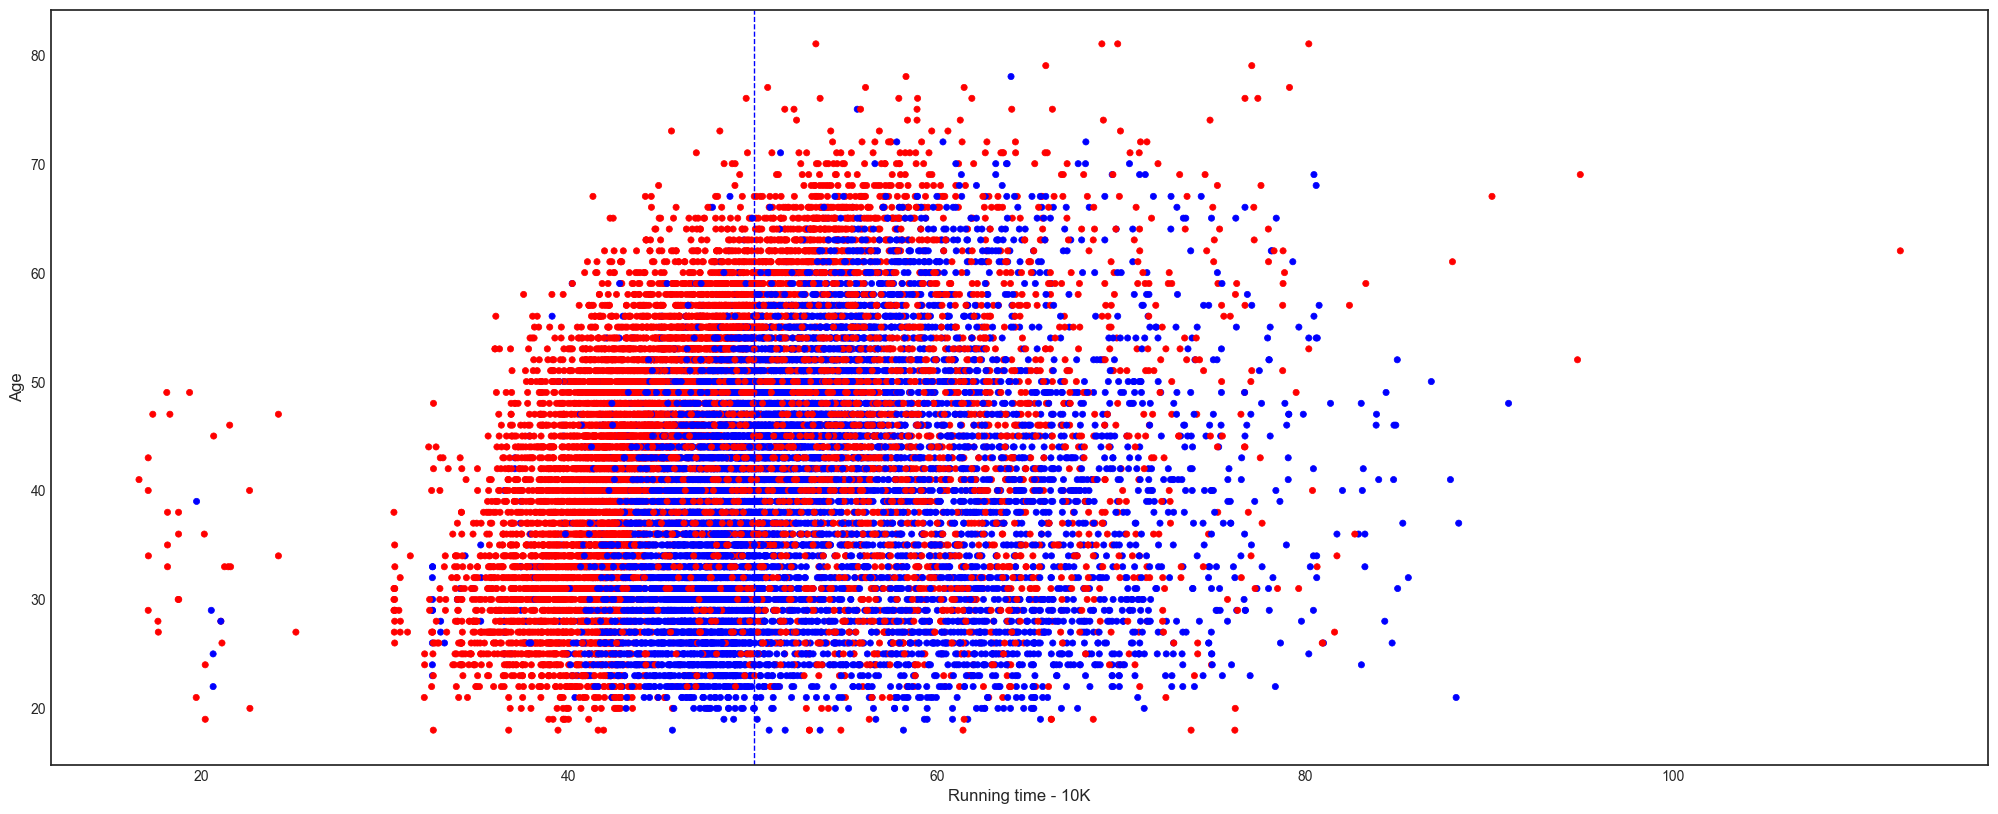

In [94]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(25, 10))

plot_df.plot(kind='scatter', x='10k', y='age', ax=ax, c=plot_df['gender'])
ax.set(xlabel='Running time - 10K', ylabel='Age')
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
plt.show()

In [95]:
# In order to use the plt.subplots we are creating the x and y data into a dataframe.
# We will create one dataframe grouped by the distance run such as 10k, 25k etc, for each cluster.
# Below we create for cluster one and 10K

plot_df = pd.DataFrame()
plot_df['10k'] = pie_1_df['10k']
plot_df['age'] = pie_1_df['age']
plot_df['gender'] = pie_1_df['gender']
plot_df['gender'] = np.where(plot_df['gender'] == 'M', 'r', 'b')

In [96]:
# Calculate the mean to draw the average line on the graphs

avg = plot_df['10k'].mean()

In [97]:
plot_df.describe()

,10k,age
count,9648.000000,9648.000000
mean,55.211758,43.227197
std,8.737200,12.044758
min,18.300000,18.000000
25%,48.630000,34.000000
50%,55.030000,43.000000
75%,61.385000,52.000000
max,102.820000,81.000000


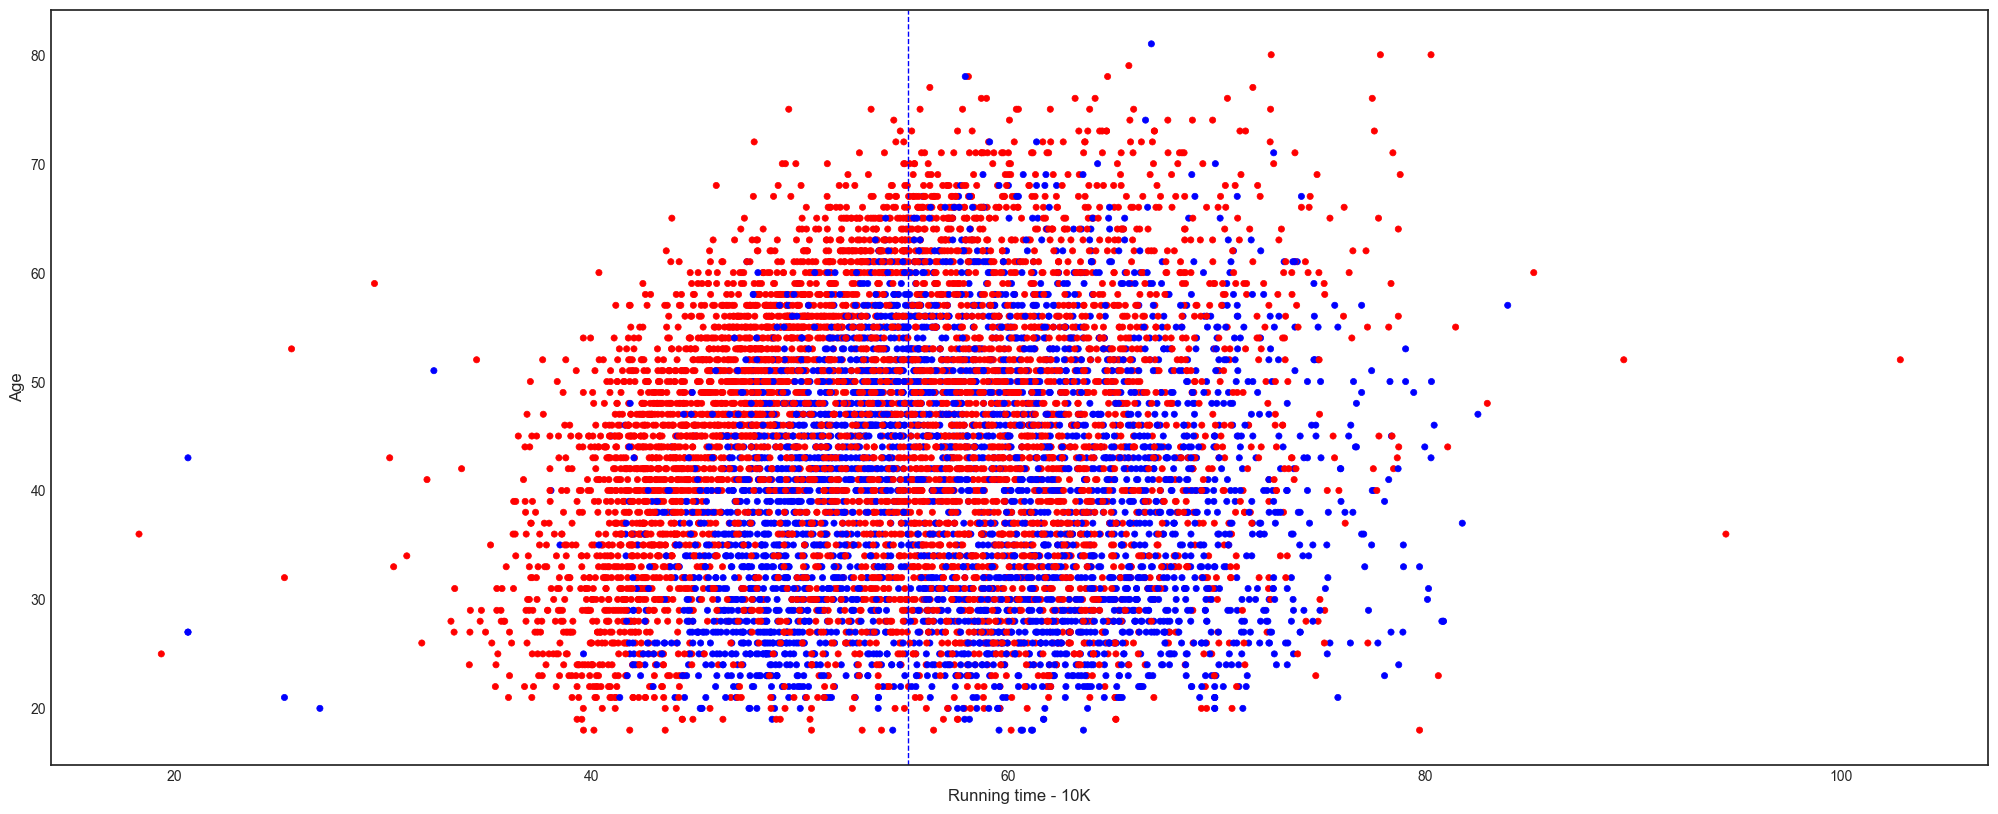

In [100]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(25, 10))

plot_df.plot(kind='scatter', x='10k', y='age', ax=ax, c=plot_df['gender'])
ax.set(xlabel='Running time - 10K', ylabel='Age')
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax.legend('Male', 'Female').set_visible(True)
plt.show()